In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings(action='ignore')
iris = load_iris()

x_data=pd.DataFrame(iris['data'],columns=iris['feature_names'])
y_data=pd.DataFrame(iris['target'],columns=['target'])

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,
                                                 test_size=0.2,
                                                 stratify=y_data)

ssc = StandardScaler()
x_train_ssc = ssc.fit_transform(x_train)
x_test_ssc = ssc.transform(x_test)

y_train=pd.get_dummies(y_train['target'])
y_test=pd.get_dummies(y_test['target'])

test=np.array([5.1,3.5,1.4,0.2])
test_ssc = ssc.transform(test.reshape(1,-1))

my_dict = {
    0:'Iris Setosa',
    1:'Iris Versicolor',
    2:'Iris Virginica'
}

In [7]:
import torch
from torch.nn import functional as F

#####

x = torch.FloatTensor(x_train_ssc)
y = torch.FloatTensor(y_train.values)

w = torch.empty([x.shape[-1],3],requires_grad=True)
b = torch.empty([3],requires_grad=True)
torch.nn.init.uniform_(w)
torch.nn.init.uniform_(b)


def cost():
    z = torch.matmul(x,w) + b
    c_i = F.cross_entropy(z,y)
    c = torch.mean(c_i)
    return c

def hxFn(xdata):
    xd = torch.FloatTensor(xdata)
    z = torch.matmul(xd,w) + b
    hx = torch.softmax(z,dim=1)
    return hx

optimizer = torch.optim.Adam([w,b],lr=0.1)

for i in range(1000):
    c=cost()
    optimizer.zero_grad()
    c.backward()
    optimizer.step()
    acc = accuracy_score(y_train.values.argmax(axis=1)
                         ,hxFn(x_train_ssc).argmax(dim=1).detach().numpy())
    print(f'epoch => {i} / cost => {cost().item()} acc => {acc} ')
    


epoch => 0 / cost => 0.8765756487846375 acc => 0.6666666666666666 
epoch => 1 / cost => 0.7094962000846863 acc => 0.675 
epoch => 2 / cost => 0.5952350497245789 acc => 0.7083333333333334 
epoch => 3 / cost => 0.5131815075874329 acc => 0.8083333333333333 
epoch => 4 / cost => 0.45129507780075073 acc => 0.825 
epoch => 5 / cost => 0.4040309488773346 acc => 0.8166666666666667 
epoch => 6 / cost => 0.36840856075286865 acc => 0.8166666666666667 
epoch => 7 / cost => 0.3420945405960083 acc => 0.8166666666666667 
epoch => 8 / cost => 0.32287219166755676 acc => 0.825 
epoch => 9 / cost => 0.3086395263671875 acc => 0.8333333333333334 
epoch => 10 / cost => 0.2975533902645111 acc => 0.8416666666666667 
epoch => 11 / cost => 0.2881665825843811 acc => 0.85 
epoch => 12 / cost => 0.27948155999183655 acc => 0.85 
epoch => 13 / cost => 0.27090975642204285 acc => 0.8583333333333333 
epoch => 14 / cost => 0.2621766924858093 acc => 0.8583333333333333 
epoch => 15 / cost => 0.25321871042251587 acc => 0.8

f1_score :  [1.    0.975 0.975]


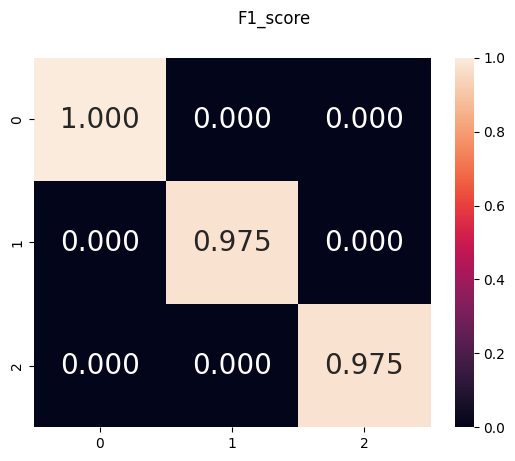

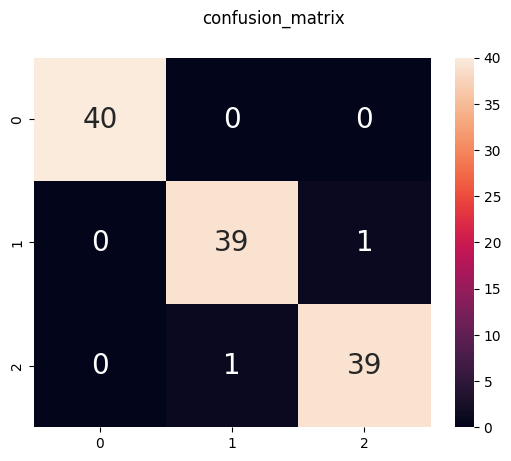

[5.1,3.5,1.4,0.2] => Iris Setosa


In [8]:
print("f1_score : ",f1_score(y_train.values.argmax(axis=1)
                             ,hxFn(x_train_ssc).argmax(dim=1).detach().numpy(),average=None))

sns.heatmap(np.diag(f1_score(y_train.values.argmax(axis=1),hxFn(x_train_ssc).argmax(dim=1).detach().numpy(),average=None)),
            annot=True,
        annot_kws={"size": 20},
        fmt=".3f"
)
plt.suptitle('F1_score')
plt.show()

sns.heatmap(
    confusion_matrix(y_train.values.argmax(axis=1),
                     hxFn(x_train_ssc).argmax(dim=1).detach().numpy()),
    annot=True,
    annot_kws={"size": 20},
    fmt=".0f")
plt.suptitle('confusion_matrix')
plt.show()

print('[5.1,3.5,1.4,0.2] =>' , my_dict[hxFn(test_ssc).argmax(dim=1).detach().numpy()[0]])